<a href="https://colab.research.google.com/github/IA2122/practica-4-paochoa/blob/main/practica4_parte3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 4 Parte III. Reducción de la dimensionalidad

Vamos a ver cómo funciona el algoritmo de PCA utilizado un dataset muy conocido en el mundo del aprendizaje automático: el dataset de los dígitos. 

El dataset de los dígitos está compuesto por 1797 imágenes de dígitos manuscritos de tamaño 8x8. Este dataset se utiliza normalmente para algoritmos de clasificación (que veremos más adelante), pero también es un buen ejemplo para ver los algoritmos de clustering y de reducción de dimensionalidad. 

Cada dígito viene representado por un vector de 64 componentes que corresponden a los valores de cada pixel del dígito. Para más información sobre este dataset ver: http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html.

En esta parte de la práctica compararemos los resultados que se obtienen utilizando K-means y K-means combinado con PCA. Para ello empezamos cargando las librerías necesarias. 

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Fijamos la semilla para obtener siempre los mismos resultados.

In [2]:
np.random.seed(42)

Cargamos el dataset de los dígitos.

In [3]:
digits = load_digits()

Obtenemos los descriptores de las instancias y estandarizamos (veremos en qué consiste este proceso más adelante) el dataset.

In [4]:
data = scale(digits.data)

Mostramos el número de instancias del dataset y el número de descriptores.

In [5]:
n_instancias, n_descriptores = data.shape
print("n_instancias %d, n_descriptores %d" % (n_instancias, n_descriptores))

n_instancias 1797, n_descriptores 64


Construimos el estimador K-means. Tenemos 10 clusters ya que de antemano sabemos que hay 10 posibles dígitos y por lo tanto 10 posibles grupos.

In [6]:
estimator = KMeans(n_clusters=10)

Realizamos la agrupación por clusters y mostramos el tiempo necesario

In [7]:
%%time 
estimator.fit(data)

CPU times: user 1.13 s, sys: 355 ms, total: 1.48 s
Wall time: 930 ms


KMeans(n_clusters=10)

Ahora definimos una función que nos indica para cada clase la distribución en clusters. Notad que los clusters no están ordenados.

In [8]:
def valida_digits(etiquetas_esperadas, etiquetas_obtenidas):
    for i in range(0,10):
        res = np.zeros(10).astype("uint8")
        for j,etiqueta in enumerate(etiquetas_esperadas):
            if(etiqueta==i):
                res[etiquetas_obtenidas[j]]+=1
        print("Dígito " + str(i) + ": ")
        print(res)

Mostramos la distribución de los dígitos (en los 10 clusteres distintos).



In [9]:
valida_digits(digits.target,estimator.labels_)

Dígito 0: 
[177   0   0   0   1   0   0   0   0   0]
Dígito 1: 
[ 0  0  0 96  1  0 27  0  0 58]
Dígito 2: 
[ 0  0  2 34  0  0 48  6 82  5]
Dígito 3: 
[  0   0   8   9   0   0   1 152  13   0]
Dígito 4: 
[  0   0   4   3 157   9   0   0   0   8]
Dígito 5: 
[ 0  2  2 59  2  0  0 72 43  2]
Dígito 6: 
[  1 175   0   4   0   0   0   0   0   1]
Dígito 7: 
[  0   0 150   0   0  18   0   0   8   3]
Dígito 8: 
[ 0  3  2 99  0  0  0 46  9 15]
Dígito 9: 
[  0   0   8   5   0   3   0 145   0  19]


Repetimos el proceso pero esta vez aplicando el algoritmo de PCA tomando 20 componentes principales

In [10]:
%%time 
pca = PCA(n_components=20).fit(data) # para reducir la dimensionalidad de 64 a 20
data_r = pca.transform(data)
estimator = KMeans(n_clusters=10)
estimator.fit(data_r)

CPU times: user 584 ms, sys: 269 ms, total: 853 ms
Wall time: 470 ms


In [11]:
valida_digits(digits.target,estimator.labels_)

Dígito 0: 
[  0   0 177   0   0   0   0   1   0   0]
Dígito 1: 
[58  0  0 96  0  0 27  0  0  1]
Dígito 2: 
[ 6 78  0 36  0  0 51  0  4  2]
Dígito 3: 
[  0  13   0   8   0   0   2   0 151   9]
Dígito 4: 
[  7   0   0   4   9   0   0 157   0   4]
Dígito 5: 
[ 2 42  0 61  0  3  0  2 70  2]
Dígito 6: 
[  1   0   1   4   0 172   3   0   0   0]
Dígito 7: 
[  3   8   0   0  17   0   0   1   0 150]
Dígito 8: 
[16  8  0 97  0  3  0  0 47  3]
Dígito 9: 
[ 19   0   0   4   3   0   3   0 142   9]


***
## Ejercicio 
Compara los resultados tanto en tiempo, como en distribución de los clusters utilizando PCA y sin utilizarlo.

En cuanto a los tiempos, el uso de PCA hace que vaya un pelín más rápido (ya que aunque el tiempo final es mayor (porque le costará más mostrarlo), el tiempo usado por el sistema es menor).
En cuanto a la distribución, se puede observar que la forma en la que distribuye los valores a través de los clústeres es muy similar en ambos casos.

In [12]:
%%time
estimator = KMeans(n_clusters=10)
sin = estimator.fit(data)

CPU times: user 1.73 s, sys: 441 ms, total: 2.17 s
Wall time: 1.73 s


In [13]:
valida_digits(digits.target,sin.labels_)

Dígito 0: 
[  0   0   0   0 177   0   0   0   0   1]
Dígito 1: 
[ 0 58  0 96  0  1  0 27  0  0]
Dígito 2: 
[ 7  5  1 38  0 82  0 44  0  0]
Dígito 3: 
[160   0   7   8   0   7   0   1   0   0]
Dígito 4: 
[  0   7   4   2   0   1   9   0   0 158]
Dígito 5: 
[77  4  4 14  0 76  0  0  4  3]
Dígito 6: 
[  0   1   0   4   1   0   0   0 175   0]
Dígito 7: 
[  0   3 152   0   0   6  18   0   0   0]
Dígito 8: 
[44 15  2 99  0 11  0  0  3  0]
Dígito 9: 
[146  19   8   2   0   2   3   0   0   0]


In [14]:
%%time
estimator = KMeans(n_clusters=10)
con = estimator.fit(data_r)

CPU times: user 717 ms, sys: 228 ms, total: 945 ms
Wall time: 800 ms


In [15]:
valida_digits(digits.target,con.labels_)

Dígito 0: 
[  0   0   0   0   0   0 177   0   0   1]
Dígito 1: 
[97  0  0 58  0  0  0 27  0  0]
Dígito 2: 
[36  4  0  4  0 80  0 49  4  0]
Dígito 3: 
[  5 149   0   0   0  12   0   2  15   0]
Dígito 4: 
[  0   0   0   7   9   0   0   0   6 159]
Dígito 5: 
[ 5 64  3  1  0 45  0  0 62  2]
Dígito 6: 
[  4   0 172   1   0   0   1   3   0   0]
Dígito 7: 
[ 11   0   0   2  17   8   0   0 139   2]
Dígito 8: 
[81 47  3 12  0 10  0  0 21  0]
Dígito 9: 
[  0 142   0  18   3   0   0   3  14   0]


***

Utilizando los siguientes comandos podemos ver el porcentaje de varianza explicado por cada una de las componentes de PCA y el total.

In [16]:
print(pca.explained_variance_ratio_)
print("Varianza total: " + str(100*np.sum(pca.explained_variance_ratio_))+ "%")

[0.12033916 0.09561054 0.08444415 0.06498408 0.04860155 0.0421412
 0.03942083 0.0338938  0.02998218 0.02931999 0.02781802 0.02577053
 0.0227529  0.02227158 0.02165106 0.01913676 0.01775422 0.01637672
 0.01596214 0.01488264]
Varianza total: 79.31140439157602%


La siguiente función nos genera un gráfico mostrando la varianza acumulada y la varianza individual que se obtiene al considerar distintos valores como componentes principales (en concreto va tomando valores entre 1 y el número de descriptores). Además esta función muestra la varianza total para cada caso.

In [17]:
def drawVarianza(data):
    pcas = [PCA(n_components=k).fit(data) for k in range(1,len(data[0]))]
    var = [pca.explained_variance_ratio_[-1] for pca in pcas]
    varianzas = [np.sum(pca.explained_variance_ratio_) for pca in pcas]
    for k in range(1,len(data[0])):
        print("Varianza total (%s componentes): %s" % (k,str(100 * varianzas[k-1])))
    plt.clf()

    plt.step(range(1,len(data[0])),varianzas,where='mid',label='varianza acumulada')
    plt.bar(range(1,len(data[0])),var,alpha=0.5,align='center',label='varianza individual')
    plt.xlabel('Componentes principales')
    plt.ylabel('Ratio de varianza explicada')
    plt.show()

Varianza total (1 componentes): 12.033916093972726
Varianza total (2 componentes): 21.594970489164183
Varianza total (3 componentes): 30.039385369382245
Varianza total (4 componentes): 36.53779328880836
Varianza total (5 componentes): 41.39793959620735
Varianza total (6 componentes): 45.61205197045041
Varianza total (7 componentes): 49.553258208997306
Varianza total (8 componentes): 52.94116055872705
Varianza total (9 componentes): 55.93746404560943
Varianza total (10 componentes): 58.87007641976633
Varianza total (11 componentes): 61.653633915471865
Varianza total (12 componentes): 64.22922289836183
Varianza total (13 componentes): 66.50129552419773
Varianza total (14 componentes): 68.73196423342954
Varianza total (15 componentes): 70.89793472153085
Varianza total (16 componentes): 72.81060891286444
Varianza total (17 componentes): 74.58904715185597
Varianza total (18 componentes): 76.2226509081915
Varianza total (19 componentes): 77.81404426013836
Varianza total (20 componentes): 79.

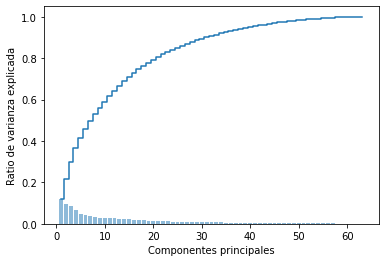

In [18]:
drawVarianza(data)

*** 
## Ejercicio
En clase hemos visto que para elegir el número de componentes k, debemos tomar el menor k tal que la varianza total sea mayor que el 99%. En nuestro caso, ¿qué valor deberíamos tomar?

Con 54 componentes se conseguiría un 99%

***

## Ejercicio adicional
Recupera los ficheros de la práctica 3 y repite el análisis hecho para el dataset de los dígitos, pero esta vez utilizando el dataset iris.csv.


In [19]:
!wget https://raw.githubusercontent.com/IA1819/Datasets/master/iris.csv -O iris.csv

--2022-03-21 15:48:10--  https://raw.githubusercontent.com/IA1819/Datasets/master/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4606 (4.5K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.50K  --.-KB/s    in 0s      

2022-03-21 15:48:10 (34.2 MB/s) - ‘iris.csv’ saved [4606/4606]



In [20]:
def valida_iris(etiquetas_esperadas, etiquetas_obtenidas):
    for i,nom in enumerate(["Iris-setosa", "Iris-versicolor", "Iris-virginica"]):
        res = np.zeros(3).astype("uint8")
        for j,etiqueta in enumerate(etiquetas_esperadas):
            if(etiqueta==nom):
                res[etiquetas_obtenidas[j]]+=1
        print(nom + ": ")
        print(res)

In [23]:
import pandas as pd

df_Iris = pd.read_csv('iris.csv')
dataIris = scale(df_Iris.iloc[:,:-1].values) # para normalizar el dataset (poner los datos en el mismo rango)
pcaIris = PCA(n_components=3).fit(dataIris)
datapca_Iris = pcaIris.transform(dataIris)
estimatorIris = KMeans(n_clusters=3)
aux = estimatorIris.fit(datapca_Iris)

In [24]:
estimatorIris.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [25]:
valida_iris(df_Iris.iloc[:,-1].values,estimatorIris.labels_)

Iris-setosa: 
[ 0 50  0]
Iris-versicolor: 
[39  0 11]
Iris-virginica: 
[14  0 36]


In [26]:
print(pcaIris.explained_variance_ratio_)
print("Varianza total: " + str(100*np.sum(pcaIris.explained_variance_ratio_))+ "%")

[0.72770452 0.23030523 0.03683832]
Varianza total: 99.48480731910936%


Varianza total (1 componentes): 72.77045209380132
Varianza total (2 componentes): 95.80097536148196
Varianza total (3 componentes): 99.48480731910936


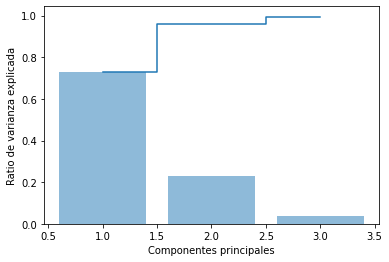

In [27]:
drawVarianza(dataIris)

## Entrega

Recuerda guardar tus cambios en tu repositorio utilizando la opción "Save a copy in GitHub..." del menú File.